# Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import math

# Loading the Data

## Markdown Cells

In [2]:
md_filepath = '../markdown_group.csv'
md_original = pd.read_csv(md_filepath)

In [3]:
# create a variable where we will modify the dataframe
md_df = md_original.copy()

In [4]:
# initial look at the data
md_df.head()

,Unnamed: 0,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,...,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers,has_param,num_stars
0,3,594,True,False,False,False,0.507588,1.000000,0.044444,3.0,...,0.000000,1.000000,1.809524,False,False,0.0,False,7.0,False,10.0
1,6,1222,True,False,False,False,1.000000,0.000000,0.161290,1.0,...,0.961538,1.000000,0.000000,False,False,0.0,False,5.0,False,0.0
2,7,1447,True,False,False,False,0.970851,0.011364,0.375887,1.0,...,0.988636,1.000000,0.000000,False,True,15.0,False,30.0,False,0.0
3,12,2705,True,False,False,False,1.000000,0.500000,0.461538,1.0,...,0.000000,0.923077,1.615385,False,False,6.0,False,7.0,False,0.0
4,15,2861,True,False,False,True,1.000000,0.214286,0.461538,1.0,...,0.000000,1.000000,6.333333,False,False,0.0,False,1.0,False,0.0


In [5]:
# drop the first two columns
md_df = md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [6]:
# get the datatypes so we can isolate the quantitative variables for binning
list(enumerate(zip(list(md_df), md_df.dtypes)))

[(0, ('longer_beginning', dtype('bool'))),
 (1, ('longer_ending', dtype('bool'))),
 (2, ('has_author', dtype('bool'))),
 (3, ('has_equation', dtype('bool'))),
 (4, ('jupyter_prop', dtype('float64'))),
 (5, ('output_cell_prop', dtype('float64'))),
 (6, ('markdown_prop', dtype('float64'))),
 (7, ('num_contrib', dtype('float64'))),
 (8, ('image_prop', dtype('float64'))),
 (9, ('is_education', dtype('bool'))),
 (10, ('has_links', dtype('bool'))),
 (11, ('has_comments', dtype('bool'))),
 (12, ('md_frequency', dtype('float64'))),
 (13, ('has_title', dtype('bool'))),
 (14, ('num_commits', dtype('float64'))),
 (15, ('md_format', dtype('bool'))),
 (16, ('non_exec_prop', dtype('float64'))),
 (17, ('exec_inorder', dtype('float64'))),
 (18, ('exec_skips', dtype('float64'))),
 (19, ('has_error', dtype('bool'))),
 (20, ('has_export', dtype('bool'))),
 (21, ('num_functions', dtype('float64'))),
 (22, ('has_test', dtype('bool'))),
 (23, ('num_headers', dtype('float64'))),
 (24, ('has_param', dtype('bo

In [8]:
# isolate the quantitative variables
md_quant_vars = [list(md_df)[i] for i in [4, 5, 6, 7, 8, 12, 14, 16, 17, 18, 21, 23, 25]]
md_quant_vars

['jupyter_prop',
 'output_cell_prop',
 'markdown_prop',
 'num_contrib',
 'image_prop',
 'md_frequency',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'num_functions',
 'num_headers',
 'num_stars']

In [9]:
# dataframe of just quantitative variables
md_quant_df = md_df[md_quant_vars]

In [10]:
# initial look at the quantitative data
md_quant_df.head()

,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,md_frequency,num_commits,non_exec_prop,exec_inorder,exec_skips,num_functions,num_headers,num_stars
0,0.507588,1.000000,0.044444,3.0,0.0,0.068182,1.0,0.000000,1.000000,1.809524,0.0,7.0,10.0
1,1.000000,0.000000,0.161290,1.0,0.0,0.333333,2.0,0.961538,1.000000,0.000000,0.0,5.0,0.0
2,0.970851,0.011364,0.375887,1.0,0.0,0.621429,1.0,0.988636,1.000000,0.000000,15.0,30.0,0.0
3,1.000000,0.500000,0.461538,1.0,0.0,0.640000,1.0,0.000000,0.923077,1.615385,6.0,7.0,0.0
4,1.000000,0.214286,0.461538,1.0,0.0,0.520000,1.0,0.000000,1.000000,6.333333,0.0,1.0,0.0


## No Markdown Cells

In [11]:
no_md_filepath = '../no_markdown_group.csv'
no_md_original = pd.read_csv(no_md_filepath)

In [12]:
# create a variable where we will modify the dataframe
no_md_df = no_md_original.copy()

In [13]:
# initial look at the data
no_md_df.head()

,Unnamed: 0,nb_id,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,num_stars
0,8,1589,False,0.714130,0.538462,1.0,0.142857,False,False,1.0,0.00000,1.000000,1.000000,False,True,2.0,False,False,1.0
1,10,1919,False,0.997840,0.780488,1.0,0.187500,False,True,1.0,0.04878,0.789474,10.631579,True,True,5.0,False,False,1.0
2,14,2857,False,0.121957,0.461538,5.0,0.000000,False,True,11.0,0.00000,0.909091,6.181818,False,True,0.0,False,False,4.0
3,27,4339,False,1.000000,0.190476,1.0,0.000000,False,True,1.0,0.00000,1.000000,1.631579,False,False,1.0,False,False,0.0
4,29,4659,False,0.940063,0.125000,3.0,0.000000,False,True,3.0,0.12500,1.000000,1.000000,True,False,3.0,False,False,0.0


In [14]:
# drop the first two columns
no_md_df = no_md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [15]:
# get the datatypes so we can isolate the quantitative variables for binning
list(enumerate(zip(list(no_md_df), no_md_df.dtypes)))

[(0, ('has_author', dtype('bool'))),
 (1, ('jupyter_prop', dtype('float64'))),
 (2, ('output_cell_prop', dtype('float64'))),
 (3, ('num_contrib', dtype('float64'))),
 (4, ('image_prop', dtype('float64'))),
 (5, ('is_education', dtype('bool'))),
 (6, ('has_comments', dtype('bool'))),
 (7, ('num_commits', dtype('float64'))),
 (8, ('non_exec_prop', dtype('float64'))),
 (9, ('exec_inorder', dtype('float64'))),
 (10, ('exec_skips', dtype('float64'))),
 (11, ('has_error', dtype('bool'))),
 (12, ('has_export', dtype('bool'))),
 (13, ('num_functions', dtype('float64'))),
 (14, ('has_test', dtype('bool'))),
 (15, ('has_param', dtype('bool'))),
 (16, ('num_stars', dtype('float64')))]

In [16]:
# isolate the quantitative variables
no_md_quant_vars = [list(no_md_df)[i] for i in [1, 2, 3, 4, 7, 8, 9, 10, 13, 16]]
no_md_quant_vars

['jupyter_prop',
 'output_cell_prop',
 'num_contrib',
 'image_prop',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'num_functions',
 'num_stars']

In [17]:
# dataframe of just quantitative variables
no_md_quant_df = no_md_df[no_md_quant_vars]

In [18]:
# initial look at the quantitative data
no_md_quant_df.head()

,jupyter_prop,output_cell_prop,num_contrib,image_prop,num_commits,non_exec_prop,exec_inorder,exec_skips,num_functions,num_stars
0,0.714130,0.538462,1.0,0.142857,1.0,0.00000,1.000000,1.000000,2.0,1.0
1,0.997840,0.780488,1.0,0.187500,1.0,0.04878,0.789474,10.631579,5.0,1.0
2,0.121957,0.461538,5.0,0.000000,11.0,0.00000,0.909091,6.181818,0.0,4.0
3,1.000000,0.190476,1.0,0.000000,1.0,0.00000,1.000000,1.631579,1.0,0.0
4,0.940063,0.125000,3.0,0.000000,3.0,0.12500,1.000000,1.000000,3.0,0.0


# First Attempt - Standardizing the Data

We will first attempt to standardize the data, then bin

In [19]:
# labels used for 3 bins (will combine medium1 and medium2)
four_labels = ['low', 'medium1', 'medium2', 'high']

In [20]:
# labels used for 2 bins
two_labels = ['lower', 'higher']

## Markdown Cells

### Standardize

In [21]:
# noramlize all variables
md_quant_stand = md_quant_df.loc[:, md_quant_vars].values
md_quant_stand = StandardScaler().fit_transform(md_quant_stand)

In [22]:
# check that the normalized data has a mean of zero and std of one
print(np.mean(md_quant_stand), np.std(md_quant_stand))

5.964331462244402e-17 1.0


In [23]:
# put the normalized features back into dataframe format
md_stand_df = pd.DataFrame(md_quant_stand, columns = md_quant_vars)

# initial look at the standardized data
md_stand_df.head()

,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,md_frequency,num_commits,non_exec_prop,exec_inorder,exec_skips,num_functions,num_headers,num_stars
0,-1.293088,1.698566,-1.942050,0.504838,-0.960204,-1.964232,-0.399981,-0.410421,0.690767,-0.337021,-0.684319,-0.124890,0.446948
1,0.570932,-2.007369,-1.286070,-0.201473,-0.960204,-0.934795,-0.056390,3.185141,0.690767,-0.487356,-0.684319,-0.340020,-0.194027
2,0.460589,-1.965256,-0.081313,-0.201473,-0.960204,0.183720,-0.399981,3.286470,0.690767,-0.487356,1.253279,2.349109,-0.194027
3,0.570932,-0.154402,0.399542,-0.201473,-0.960204,0.255823,-0.399981,-0.410421,0.003778,-0.353150,0.090720,-0.124890,-0.194027
4,0.570932,-1.213240,0.399542,-0.201473,-0.960204,-0.210071,-0.399981,-0.410421,0.690767,0.038819,-0.684319,-0.770281,-0.194027


### Bin

In [24]:
# create a copy of the data that we will bin 
md_binned_df = md_stand_df.copy()

In [25]:
# for each quantitative field in the data
for quant_var in md_quant_vars:
    
    # change the column in the dataframe so that it is binned into low, medium, and high
    md_binned_df.loc[:, quant_var] = pd.cut(md_binned_df[quant_var], 4, labels = four_labels)
    
    # combine medium1 and medium2
    md_binned_df.loc[:, quant_var] = md_binned_df[quant_var].replace(['medium1', 'medium2'], 'medium')

In [26]:
# initial look at the binned data
md_binned_df.head()

,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,md_frequency,num_commits,non_exec_prop,exec_inorder,exec_skips,num_functions,num_headers,num_stars
0,medium,high,low,low,low,low,low,low,high,low,low,low,low
1,high,low,low,low,low,medium,low,high,high,low,low,low,low
2,high,low,medium,low,low,medium,low,high,high,low,low,medium,low
3,high,medium,medium,low,low,medium,low,low,high,low,low,low,low
4,high,low,medium,low,low,medium,low,low,high,low,low,low,low


In [27]:
# check the bin counts
for quant_var in md_quant_vars:
    print(md_binned_df[quant_var].value_counts())

high      1804
medium     346
low        141
Name: jupyter_prop, dtype: int64
medium    1383
high       529
low        379
Name: output_cell_prop, dtype: int64
medium    1672
low        544
high        75
Name: markdown_prop, dtype: int64
low       2218
medium      61
high        12
Name: num_contrib, dtype: int64
low       1196
medium     881
high       214
Name: image_prop, dtype: int64
medium    1276
high       660
low        355
Name: md_frequency, dtype: int64
low       2192
medium      90
high         9
Name: num_commits, dtype: int64
low       2003
high       173
medium     115
Name: non_exec_prop, dtype: int64
high      2130
medium     157
low          4
Name: exec_inorder, dtype: int64
low       2255
medium      34
high         2
Name: exec_skips, dtype: int64
low       2237
medium      53
high         1
Name: num_functions, dtype: int64
low       1983
medium     292
high        16
Name: num_headers, dtype: int64
low       2246
medium      23
high        22
Name: num_stars, dt

No change, so this attempt failed

# Second Attempt - Data Transformations

Maybe we can do some kind of data transformation on the variables

## Markdown Cells

Based on the binning numbers from the previous cell, I believe the columns that we have to transform are:

- `markdown_prop` - sqrt, 3 bins
- `num_contrib` - log + 0.5, 2 bins
- `num_commits` - log + 0.5, 2 bins
- `exec_inorder` - square, 2 bins
- `exec_skips` - log + 0.5, 2 bins
- `num_functions` - log + 0.5, 2 bins
- `num_headers` - log + 0.5, 3 bins
- `num_stars` - log + 0.5, 2 bins

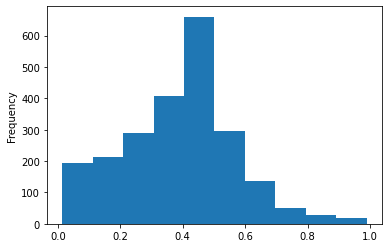

In [75]:
# create a copy of markdown_prop column that we will play with
md_markdown_prop = md_quant_df['markdown_prop'].copy()

# plot the data
md_markdown_prop.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data

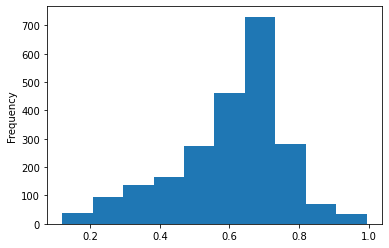

In [76]:
# transform the column
md_markdown_prop = md_markdown_prop.transform(lambda x : math.sqrt(x))

# plot the column again
md_markdown_prop.plot(kind = 'hist')

In [77]:
# try to bin the data again
md_markdown_prop = pd.cut(md_markdown_prop, 4, labels = four_labels)

# combine medium1 and medium2
md_markdown_prop = md_markdown_prop.replace(['medium1', 'medium2'], 'medium')

# check bin counts
md_markdown_prop.value_counts()

medium    1879
high       216
low        196
Name: markdown_prop, dtype: int64

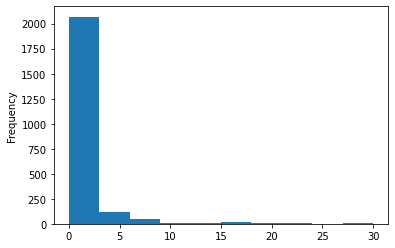

In [97]:
# create a copy of num_contrib column
md_num_contrib = md_quant_df['num_contrib'].copy()

# plot the data
md_num_contrib.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable

In [98]:
# put the data into two bins
md_num_contrib = pd.cut(md_num_contrib, 2, labels = two_labels)

# check the bin counts
md_num_contrib.value_counts()

lower     2255
higher      36
Name: num_contrib, dtype: int64

Since the bin numbers are still too low, we still have to transform the data

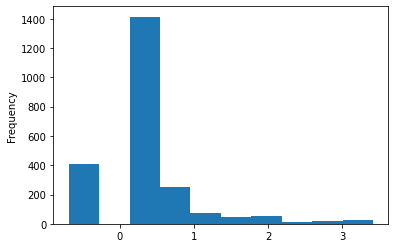

In [127]:
# go back to original quantitative form of the column
md_num_contrib = md_quant_df['num_contrib'].copy()

# transform the column
md_num_contrib = md_num_contrib.transform(lambda x : math.log(x + 0.5))

# plot the column again
md_num_contrib.plot(kind = 'hist')

In [128]:
# try to bin the data again
md_num_contrib = pd.cut(md_num_contrib, 2, labels = two_labels)

# check bin counts
md_num_contrib.value_counts()

lower     2140
higher     151
Name: num_contrib, dtype: int64

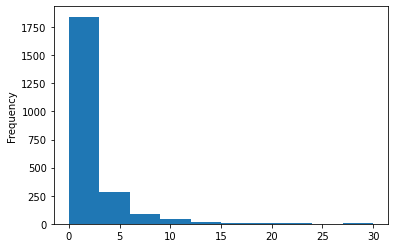

In [123]:
# make a copy of the num_commits column
md_num_commits = md_quant_df['num_commits'].copy()

# plot the data
md_num_commits.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable

In [124]:
# put the data into two bins
md_num_commits = pd.cut(md_num_commits, 2, labels = two_labels)

# check the bin counts
md_num_commits.value_counts()

lower     2266
higher      25
Name: num_commits, dtype: int64

Since the bin numbers are still too low, we still have to transform the data

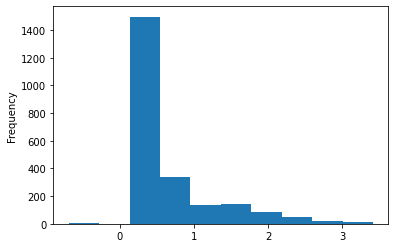

In [130]:
# go back to original quantitative form of the column
md_num_commits = md_quant_df['num_commits'].copy()

# transform the column
md_num_commits = md_num_commits.transform(lambda x : math.log(x + 0.5))

# plot the column again
md_num_commits.plot(kind = 'hist')

In [131]:
# try to bin the data again
md_num_commits = pd.cut(md_num_commits, 2, labels = two_labels)

# check bin counts
md_num_commits.value_counts()

lower     1981
higher     310
Name: num_commits, dtype: int64

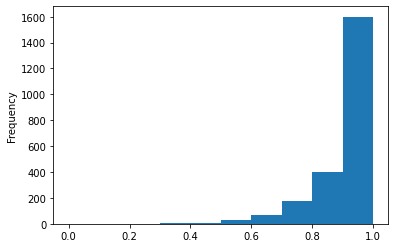

In [139]:
# make a copy of the exec_inorder column
md_exec_inorder = md_quant_df['exec_inorder'].copy()

# plot the column
md_exec_inorder.plot(kind = 'hist')

Since the data is left-skewed, we can try squaring the data. Tried squaring and cubing the data and unsuccessful, so we switch to two bins for this column

In [140]:
# put column into two bins
md_exec_inorder = pd.cut(md_exec_inorder, 2, labels = two_labels)

# check the bin counts
md_exec_inorder.value_counts()

higher    2268
lower       23
Name: exec_inorder, dtype: int64

Since the bin numbers are still too low, we still perform a data transformation

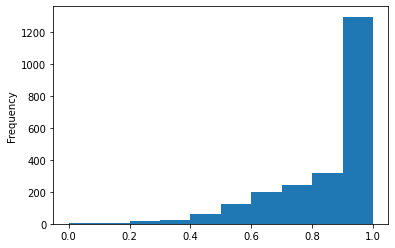

In [141]:
md_exec_inorder = md_quant_df['exec_inorder'].copy()

# transform the column
md_exec_inorder = md_exec_inorder.transform(lambda x : x ** 2)

# plot again
md_exec_inorder.plot(kind = 'hist')

In [142]:
# try to bin the data again
md_exec_inorder = pd.cut(md_exec_inorder, 2, labels = two_labels)

# check bin counts
md_exec_inorder.value_counts()

higher    2180
lower      111
Name: exec_inorder, dtype: int64

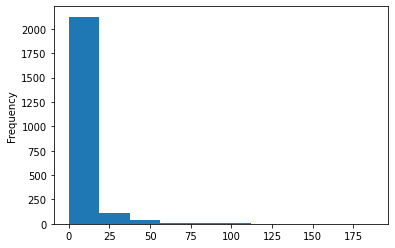

In [153]:
# make a copy of the exec_skips column
md_exec_skips = md_quant_df['exec_skips'].copy()

# plot the column
md_exec_skips.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable

In [154]:
# put the data into two bins
md_exec_skips = pd.cut(md_exec_skips, 2, labels = two_labels)

# check the bin counts
md_exec_skips.value_counts()

lower     2284
higher       7
Name: exec_skips, dtype: int64

Since the bin counts are still too low, we still do a data transformation

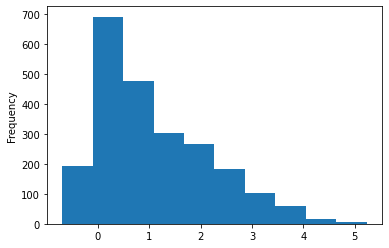

In [159]:
md_exec_skips = md_quant_df['exec_skips'].copy()

# transform the column
md_exec_skips = md_exec_skips.transform(lambda x : math.log(x + 0.5))

# plot again
md_exec_skips.plot(kind = 'hist')

In [160]:
# try to bin the data again
md_exec_skips = pd.cut(md_exec_skips, 2, labels = two_labels)

# check bin counts
md_exec_skips.value_counts()

lower     1925
higher     366
Name: exec_skips, dtype: int64

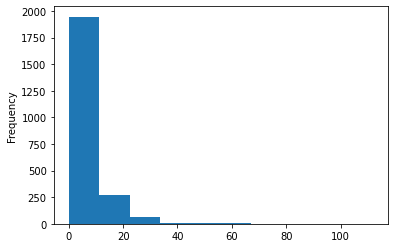

In [40]:
# create a copy of num_functions column
md_num_functions = md_quant_df['num_functions'].copy()

# plot the data
md_num_functions.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good buns, so we can switch to two bins for this variable

In [41]:
# put the data into two bins
md_num_functions = pd.cut(md_num_functions, 2, labels = two_labels)

# check the bin counts
md_num_functions.value_counts()

lower     2287
higher       4
Name: num_functions, dtype: int64

Since the bin numbers are still too low, we still have to transform the data

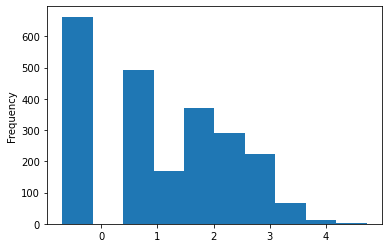

In [46]:
# go back to original quantitative form of the column
md_num_functions = md_quant_df['num_functions'].copy()

# transform the column
md_num_functions = md_num_functions.transform(lambda x : math.log(x + 0.5))

# plot the column again
md_num_functions.plot(kind = 'hist')

In [47]:
# try to bin the data again
md_num_functions = pd.cut(md_num_functions, 2, labels = two_labels)

# check the bin counts
md_num_functions.value_counts()

lower     1752
higher     539
Name: num_functions, dtype: int64

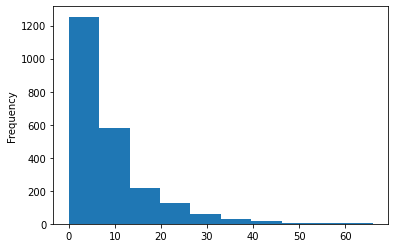

In [59]:
# create a copy of the num_headers column
md_num_headers = md_quant_df['num_headers'].copy()

# plot the data
md_num_headers.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data

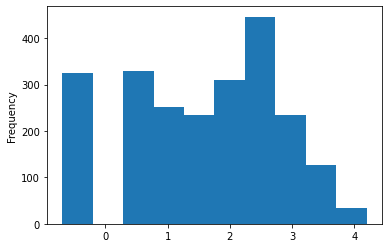

In [60]:
# transform the column
md_num_headers = md_num_headers.transform(lambda x : math.log(x + 0.5))

# plot the column again
md_num_headers.plot(kind = 'hist')

In [61]:
# try to bin the data again
md_num_headers = pd.cut(md_num_headers, 4, labels = four_labels)

# combine medium1 and medium2
md_num_headers = md_num_headers.replace(['medium1', 'medium2'], 'medium')

# check bin counts
md_num_headers.value_counts()

medium    1392
low        655
high       244
Name: num_headers, dtype: int64

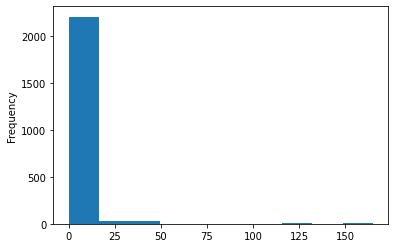

In [43]:
# create a copy of the num_stars column
md_num_stars = md_quant_df['num_stars'].copy()

# plot the data
md_num_stars.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable

In [42]:
# put the data into two bins
md_num_stars = pd.cut(md_num_stars, 2, labels = two_labels)

# check the bin counts
md_num_stars.value_counts()

lower     2268
higher      23
Name: num_stars, dtype: int64

Since the bin numbers are still too low, we still have to transform the data

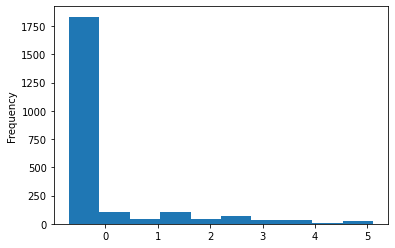

In [57]:
# copy original
md_num_stars = md_quant_df['num_stars'].copy()

# transform the column
md_num_stars = md_num_stars.transform(lambda x : math.log(x + 0.5))

# plot the column again
md_num_stars.plot(kind = 'hist')

In [58]:
# try to bin the data again
md_num_stars = pd.cut(md_num_stars, 2, labels = two_labels)

# check bin counts
md_num_stars.value_counts()

lower     2133
higher     158
Name: num_stars, dtype: int64

## No Markdown Cells

### Looking at Past Bin Results

In [48]:
# create a copy of the data that we will bin
no_md_binned_df = no_md_df.copy()

In [49]:
# for each quantitative field in the data
for quant_var in no_md_quant_vars:
    
    # change the column in the dataframe so that it is binned into low, medium, and high
    no_md_binned_df.loc[:, quant_var] = pd.cut(no_md_binned_df[quant_var], 4, labels = four_labels)
    
    # combine medium1 and medium2
    no_md_binned_df.loc[:, quant_var] = no_md_binned_df[quant_var].replace(['medium1', 'medium2'], 'medium')

In [50]:
# initial look at the binned data
no_md_binned_df.head()

,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,num_stars
0,False,medium,medium,low,low,False,False,low,low,high,low,False,True,low,False,False,low
1,False,high,high,low,low,False,True,low,low,high,low,True,True,low,False,False,low
2,False,low,medium,low,low,False,True,medium,low,high,low,False,True,low,False,False,low
3,False,high,low,low,low,False,True,low,low,high,low,False,False,low,False,False,low
4,False,high,low,low,low,False,True,low,low,high,low,True,False,low,False,False,low


In [51]:
# check the bin counts
for quant_var in no_md_quant_vars:
    print(no_md_binned_df[quant_var].value_counts())

high      1040
medium     254
low         60
Name: jupyter_prop, dtype: int64
medium    794
low       393
high      167
Name: output_cell_prop, dtype: int64
low       1322
medium      29
high         3
Name: num_contrib, dtype: int64
low       915
medium    281
high      158
Name: image_prop, dtype: int64
low       1337
medium      16
high         1
Name: num_commits, dtype: int64
low       1177
medium      93
high        84
Name: non_exec_prop, dtype: int64
high      1164
medium     169
low         21
Name: exec_inorder, dtype: int64
low       1347
medium       6
high         1
Name: exec_skips, dtype: int64
low       1300
medium      50
high         4
Name: num_functions, dtype: int64
low       1343
medium       8
high         3
Name: num_stars, dtype: int64


In [52]:
# copy the dataframe again and try doing two bins
no_md_binned_df = no_md_df.copy()

In [53]:
# for each quantitative field in the data
for quant_var in no_md_quant_vars:
    
    # change the column in the dataframe so that it is binned into lower and higher
    no_md_binned_df.loc[:, quant_var] = pd.cut(no_md_binned_df[quant_var], 2, labels = two_labels)

In [54]:
# initial look at the binned data
no_md_binned_df.head()

,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,num_stars
0,False,higher,higher,lower,lower,False,False,lower,lower,higher,lower,False,True,lower,False,False,lower
1,False,higher,higher,lower,lower,False,True,lower,lower,higher,lower,True,True,lower,False,False,lower
2,False,lower,lower,lower,lower,False,True,lower,lower,higher,lower,False,True,lower,False,False,lower
3,False,higher,lower,lower,lower,False,True,lower,lower,higher,lower,False,False,lower,False,False,lower
4,False,higher,lower,lower,lower,False,True,lower,lower,higher,lower,True,False,lower,False,False,lower


In [55]:
# check the value counts
for quant_var in no_md_quant_vars:
    print(no_md_binned_df[quant_var].value_counts())

higher    1263
lower       91
Name: jupyter_prop, dtype: int64
lower     841
higher    513
Name: output_cell_prop, dtype: int64
lower     1347
higher       7
Name: num_contrib, dtype: int64
lower     1101
higher     253
Name: image_prop, dtype: int64
lower     1353
higher       1
Name: num_commits, dtype: int64
lower     1248
higher     106
Name: non_exec_prop, dtype: int64
higher    1289
lower       65
Name: exec_inorder, dtype: int64
lower     1353
higher       1
Name: exec_skips, dtype: int64
lower     1348
higher       6
Name: num_functions, dtype: int64
lower     1350
higher       4
Name: num_stars, dtype: int64


### Data Transformations

Based on the binning numbers from the previous cells (results from having three bins), I believe the columns that we have to transform are:

- `jupyter_prop`: cubed, 3 bins
- `num_contrib`: log + 0.5, 2 bins
- `num_commits`: fourth root, 2 bins
- `non_exec_prop`: 2 bins
- `exec_inorder`: square, 2 bins
- `exec_skips`: log + 0.5, 2 bins
- `num_functions`: log + 0.5, 2 bins
- `num_stars`: log + 0.5, 2 bins

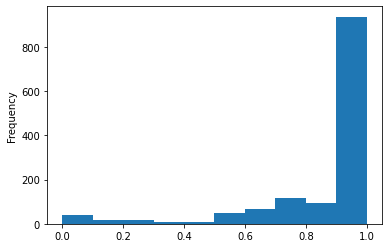

In [228]:
# create a copy of the jupyter_prop column
no_md_jupyter_prop = no_md_quant_df['jupyter_prop'].copy()

# plot the data
no_md_jupyter_prop.plot(kind = 'hist')

Since the data is left-skewed, we can try to square the data. 

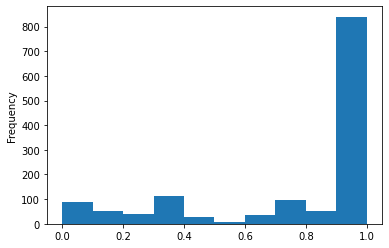

In [229]:
# transform the column
no_md_jupyter_prop = no_md_jupyter_prop.transform(lambda x : x ** 3)

# plot again
no_md_jupyter_prop.plot(kind = 'hist')

In [230]:
# try to bin the data again
no_md_jupyter_prop = pd.cut(no_md_jupyter_prop, 4, labels = four_labels)

# combine medium1 and medium2
no_md_jupyter_prop = no_md_jupyter_prop.replace(['medium1', 'medium2'], 'medium')

# check bin counts
no_md_jupyter_prop.value_counts()

high      910
medium    286
low       159
Name: jupyter_prop, dtype: int64

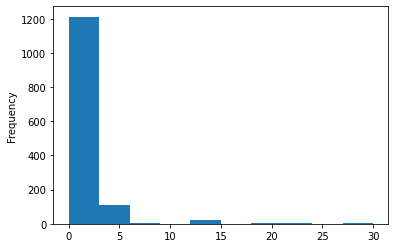

In [237]:
# create a copy of num_contrib column
no_md_num_contrib = no_md_quant_df['num_contrib'].copy()

# plot the data
no_md_num_contrib.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable.

Based on the results of two bins for this variable in the previous section, we still have to transform the data

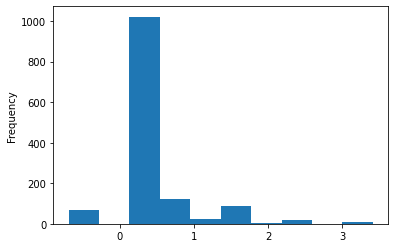

In [238]:
# transform the column
no_md_num_contrib = no_md_num_contrib.transform(lambda x : math.log(x + 0.5))

# plot again
no_md_num_contrib.plot(kind = 'hist')

In [239]:
# try to bin the data again
no_md_num_contrib = pd.cut(no_md_num_contrib, 2, labels = two_labels)

# check bin counts
no_md_num_contrib.value_counts()

lower     1237
higher     118
Name: num_contrib, dtype: int64

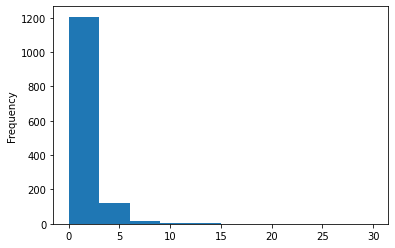

In [323]:
# make a copy of the num_commits column
no_md_num_commits = no_md_quant_df['num_commits'].copy()

# plot the data
no_md_num_commits.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable.

Based on the results of two bins for this variable in the previous section, we still have to transform the data

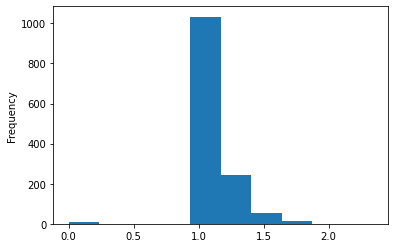

In [324]:
# transform the data
no_md_num_commits = no_md_num_commits.transform(lambda x : x ** (1. / 4))

# plot again
no_md_num_commits.plot(kind = 'hist')

In [325]:
# try to bin the data again
no_md_num_commits = pd.cut(no_md_num_commits, 2, labels = two_labels)

# check bin counts
no_md_num_commits.value_counts()

lower     1042
higher     313
Name: num_commits, dtype: int64

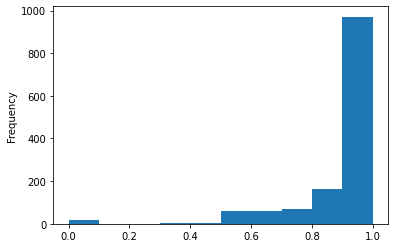

In [316]:
# make a copy of the exec_inorder column
no_md_exec_inorder = no_md_quant_df['exec_inorder'].copy()

# plot the column
no_md_exec_inorder.plot(kind = 'hist')

Since the data is left-skewed, we can try squaring the data. Tried squaring and cubing the data and none of them produced good bins, so we can switch to two bins for this variable.

Based on the results of two bins for this variable in the previous section, we still have to transform the data

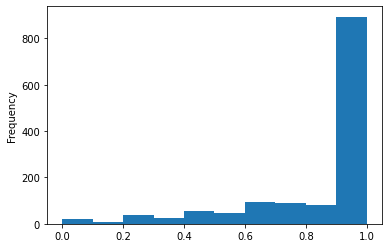

In [294]:
# transform the data
no_md_exec_inorder = no_md_exec_inorder.transform(lambda x : x ** 2)

# plot again
no_md_exec_inorder.plot(kind = 'hist')

In [295]:
# try to bin the data again
no_md_exec_inorder = pd.cut(no_md_exec_inorder, 2, labels = two_labels)

# check bin counts
no_md_exec_inorder.value_counts()

higher    1205
lower      150
Name: exec_inorder, dtype: int64

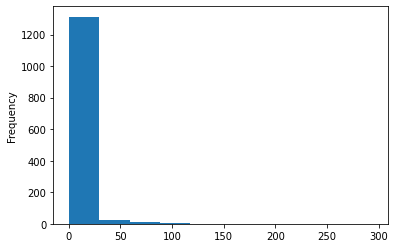

In [308]:
# make a copy of the exec_skips column
no_md_exec_skips = no_md_quant_df['exec_skips'].copy()

# plot the column
no_md_exec_skips.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable.

Based on the results of two bins for this variable in the previous section, we still have to transform the data

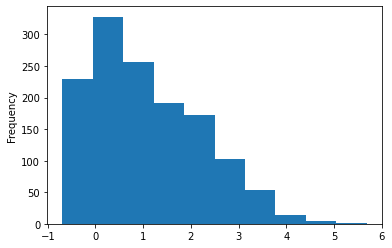

In [309]:
# transform the column
no_md_exec_skips = no_md_exec_skips.transform(lambda x : math.log(x + 0.5))

# plot again
no_md_exec_skips.plot(kind = 'hist')

In [310]:
# try to bin the data again
no_md_exec_skips = pd.cut(no_md_exec_skips, 2, labels = two_labels)

# check bin counts
no_md_exec_skips.value_counts()

lower     1179
higher     176
Name: exec_skips, dtype: int64

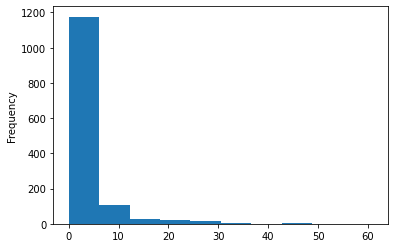

In [86]:
# create a copy of the num_functions column
no_md_num_functions = no_md_quant_df['num_functions'].copy()

# plot the data
no_md_num_functions.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable

Based on the  results of two bins for this variable in the previous section, we still have to transform the data

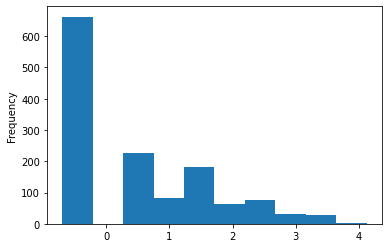

In [87]:
# transform the column
no_md_num_functions = no_md_num_functions.transform(lambda x : math.log(x + 0.5))

# plot the column again
no_md_num_functions.plot(kind = 'hist')

In [88]:
# try to bin the data again
no_md_num_functions = pd.cut(no_md_num_functions, 2, labels = two_labels)

# check bin counts
no_md_num_functions.value_counts()

lower     1153
higher     201
Name: num_functions, dtype: int64

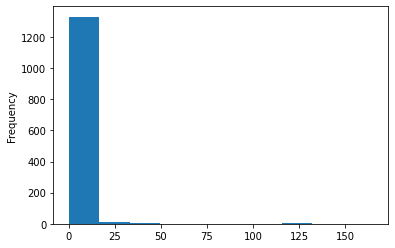

In [69]:
# create a copy of the num_stars column
no_md_num_stars = no_md_quant_df['num_stars'].copy()

# plot the data
no_md_num_stars.plot(kind = 'hist')

Since the data is right-skewed, we can try to square root the data. Tried three different transformations and none of them produced good bins, so we can switch to two bins for this variable

In [70]:
# put the data into two bins
no_md_num_stars = pd.cut(no_md_num_stars, 2, labels = two_labels)

# check the bin counts
no_md_num_stars.value_counts()

lower     1350
higher       4
Name: num_stars, dtype: int64

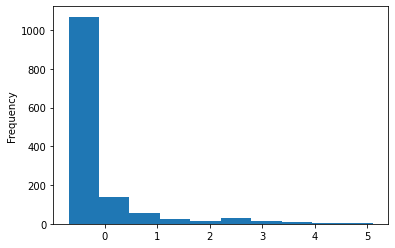

In [85]:
# copy the original column
no_md_num_stars = no_md_quant_df['num_stars'].copy()

# transform the column
no_md_num_stars = no_md_num_stars.transform(lambda x : math.log(x + 0.5))

# plot the column again
no_md_num_stars.plot(kind = 'hist')

In [86]:
# try to bin the data again
no_md_num_stars = pd.cut(no_md_num_stars, 2, labels = two_labels)

# check bin counts
no_md_num_stars.value_counts()

lower     1299
higher      55
Name: num_stars, dtype: int64

Tried all different transformations, and this was the biggest bin size I could get.

# Export the Binned Data

In [87]:
# function that performs binning (2 or 3 bins)
def bin_column(col,  num_bins):
    
    if num_bins == 2:
        return pd.cut(col, 2, labels = two_labels)
    elif num_bins == 3:
        # put data into four bins first
        four_bins = pd.cut(col, 4, labels = four_labels)
        
        # combine medium1 and medium2
        return four_bins.replace(['medium1', 'medium2'], 'medium')
    else:
        return None

## Markdown Cells

In [88]:
# python dictionary of quantitative fields and the number of bins + transformations
md_quant_bins = {
    'jupyter_prop': (3, lambda x : x),
    'markdown_prop': (3, lambda x : math.sqrt(x)),
    'num_contrib': (2, lambda x : math.log(x + 0.5)),
    'image_prop': (3, lambda x : x),
    'output_cell_prop': (3, lambda x : x),
    'md_frequency': (3, lambda x : x),
    'num_commits': (2, lambda x : math.log(x + 0.5)),
    'non_exec_prop': (3, lambda x : x),
    'exec_inorder': (2, lambda x : x ** 2),
    'exec_skips': (2, lambda x : math.log(x + 0.5)),
    'num_functions': (2, lambda x : math.log(x + 0.5)),
    'num_headers': (3, lambda x : math.log(x + 0.5)),
    'num_stars': (2, lambda x : math.log(x + 0.5))
}

In [89]:
# create the dataframe that we will perform binning on
md_binned_df = md_original.copy()

In [98]:
# for each column in the dataframe
for var in list(md_binned_df):
    
    # check if quantitative (then it needs to be binned)
    if var in md_quant_bins.keys():
        
        # extract the number of bins and the transformation
        (bins, transformation) = md_quant_bins[var]
        
        # perform the transformation
        md_binned_df[var] = md_binned_df[var].apply(transformation)
        
        # bin the data
        md_binned_df[var] = bin_column(md_binned_df[var], bins)

In [99]:
# initial look at the binned data 
md_binned_df.head()

,Unnamed: 0,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,...,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,num_headers
0,3,594,True,False,False,False,medium,high,low,lower,...,lower,True,low,higher,lower,False,False,lower,False,medium
1,6,1222,True,False,False,False,high,low,medium,lower,...,lower,True,high,higher,lower,False,False,lower,False,medium
2,7,1447,True,False,False,False,high,low,medium,lower,...,lower,True,high,higher,lower,False,True,higher,False,high
3,12,2705,True,False,False,False,high,medium,medium,lower,...,lower,False,low,higher,lower,False,False,lower,False,medium
4,15,2861,True,False,False,True,high,low,medium,lower,...,lower,False,low,higher,lower,False,False,lower,False,low


In [100]:
# clear the first column 
md_binned_df = md_binned_df.drop(['Unnamed: 0'], axis = 1)

In [101]:
# check the bin counts
for quant_var in md_quant_vars:
    print(md_binned_df[quant_var].value_counts())

high      1804
medium     346
low        141
Name: jupyter_prop, dtype: int64
medium    1383
high       529
low        379
Name: output_cell_prop, dtype: int64
medium    1879
high       216
low        196
Name: markdown_prop, dtype: int64
lower     2140
higher     151
Name: num_contrib, dtype: int64
low       1241
medium     873
high       177
Name: image_prop, dtype: int64
medium    1276
high       660
low        355
Name: md_frequency, dtype: int64
lower     1981
higher     310
Name: num_commits, dtype: int64
low       2003
high       173
medium     115
Name: non_exec_prop, dtype: int64
higher    2180
lower      111
Name: exec_inorder, dtype: int64
lower     1925
higher     366
Name: exec_skips, dtype: int64
lower     1752
higher     539
Name: num_functions, dtype: int64
medium    1392
low        655
high       244
Name: num_headers, dtype: int64


In [102]:
# export the binned data to a csv
md_binned_df.to_csv('markdown_group_binned.csv')

## No Markdown Cells

In [103]:
# python dictionary of quantitative fields and the number of bins + transformations
no_md_quant_bins = {
    'jupyter_prop': (3, lambda x : x ** 3),
    'num_contrib': (2, lambda x : math.log(x + 0.5)),
    'image_prop': (3, lambda x : x),
    'output_cell_prop': (3, lambda x : x),
    'num_commits': (2, lambda x : x ** (1. / 4)),
    'non_exec_prop': (2, lambda x : x),
    'exec_inorder': (2, lambda x : x ** 2),
    'exec_skips': (2, lambda x : math.log(x + 0.5)),
    'num_functions': (2, lambda x : math.log(x + 0.5))
}

In [104]:
# create the dataframe that we will perform binning on
no_md_binned_df = no_md_original.copy()

In [105]:
# for each column in the dataframe
for var in list(no_md_binned_df):
    
    # check if quantitative (then it needs to be binned)
    if var in no_md_quant_bins.keys():
        
        # extract the number of bins and the transformation
        (bins, transformation) = no_md_quant_bins[var]
        
        # perform the transformation
        no_md_binned_df[var] = no_md_binned_df[var].apply(transformation)
        
        # bin the data
        no_md_binned_df[var] = bin_column(no_md_binned_df[var], bins)

In [106]:
# initial look at the binned data
no_md_binned_df.head()

,Unnamed: 0,nb_id,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test
0,8,1589,False,medium,medium,lower,low,False,False,lower,lower,higher,lower,False,True,lower,False
1,10,1919,False,high,high,lower,low,False,True,lower,lower,higher,lower,True,True,lower,False
2,14,2857,False,low,medium,higher,low,False,True,higher,lower,higher,lower,False,True,lower,False
3,27,4339,False,high,low,lower,low,False,True,lower,lower,higher,lower,False,False,lower,False
4,29,4659,False,high,low,lower,low,False,True,higher,lower,higher,lower,True,False,lower,False


In [107]:
# clear the first column
no_md_binned_df = no_md_binned_df.drop(['Unnamed: 0'], axis = 1)

In [108]:
# check the bin counts
for quant_var in no_md_quant_vars:
    print(no_md_binned_df[quant_var].value_counts())

high      910
medium    286
low       158
Name: jupyter_prop, dtype: int64
medium    794
low       393
high      167
Name: output_cell_prop, dtype: int64
lower     1236
higher     118
Name: num_contrib, dtype: int64
low       915
medium    281
high      158
Name: image_prop, dtype: int64
lower     1041
higher     313
Name: num_commits, dtype: int64
lower     1248
higher     106
Name: non_exec_prop, dtype: int64
higher    1204
lower      150
Name: exec_inorder, dtype: int64
lower     1178
higher     176
Name: exec_skips, dtype: int64
lower     1153
higher     201
Name: num_functions, dtype: int64


In [109]:
# export the binned data to a csv
no_md_binned_df.to_csv('no_markdown_group_binned.csv')